## 딥러닝

### 심층신경망

In [8]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전장에서 다운로드 했기때문에 다시 다운로드 하지 않음

In [6]:
# 훈련세트, 검증세트 분리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [9]:
# 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))

In [10]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [13]:
print(train_scaled.shape, val_scaled.shape, test_scaled.shape)
print(train_target.shape, val_target.shape, test_target.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


#### 심층신경망 만들기

In [ ]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [15]:
# 신경망 모델 생성
model = keras.Sequential([dense1, dense2])

In [16]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기2

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name = 'output')
], name='Fashion_MNIST_Model')

In [28]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# 모델 훈련전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [30]:
# 훈련
model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4681 - accuracy: 0.8370
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3559 - accuracy: 0.8735
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3203 - accuracy: 0.8847
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2949 - accuracy: 0.8935
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2747 - accuracy: 0.9016
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2584 - accuracy: 0.9067
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2436 - accuracy: 0.9130
Epoch 8/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2303 - accuracy: 0.9180
Epoch 9/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2171 - accuracy: 0.9226
Epoch 10/100
1500/1500 [==============================] - 2s 1ms/step -

In [ ]:
model.evaluate(val_scaled, val_target)
# 검증 정확도: 87.8%

375/375 [==============================] - 0s 894us/step - loss: 0.8671 - accuracy: 0.8776


[0.8671313524246216, 0.8775833249092102]

In [33]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 849us/step


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [44]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [47]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]
    # plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color = 'blue')
    plt.text(0, -3, f'예측: {pred_label}', fontsize=12, color = 'red', fontweight = 'bold')

    plt.axis('off')
    plt.show()

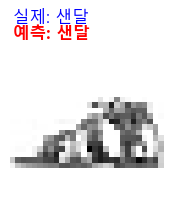

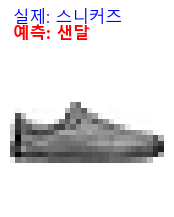

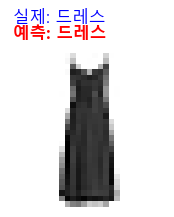

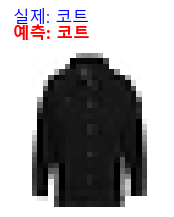

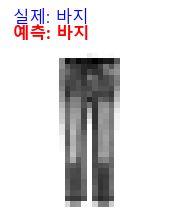

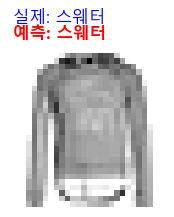

In [48]:
for i in range(11, 17):
    show_image(i)

#### 렐루 함수

- 인공 신경망 은닉층에 초기에는 Sigmoid 함수 사용
    - 단점: 오른쪽, 왼쪽 끝으로 갈 수록 그래프가 누워있어서 올바른 출력을 못만듬

- 렐루 함수(ReLU): 

    <img src="../image/ml0011.png" width = "500">

#### Flatten 객체
- 이미지 2차원배열을 1차원으로 변경할 때 np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌

In [49]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [50]:
model2.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [54]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [55]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

In [56]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [57]:
# 모델 훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5287 - accuracy: 0.8150
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3922 - accuracy: 0.8607
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3556 - accuracy: 0.8729
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3313 - accuracy: 0.8811
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3167 - accuracy: 0.8846
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3025 - accuracy: 0.8912
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2951 - accuracy: 0.8947
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.8994
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2756 - accuracy: 0.9015
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.270

In [59]:
model2.evaluate(val_scaled, val_target)
# ReLU함수 사용시, Sigmoid함수 사용시 0.01% 개선

375/375 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.8813


[0.43262606859207153, 0.8813333511352539]

#### 옵티마이저
- 하이퍼파라미터 값 최적화

In [60]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [61]:
# 모델3 설정, 최적화는 adam 사용할것
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [62]:
# 모델 훈련
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5217 - accuracy: 0.8141
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3967 - accuracy: 0.8578
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3558 - accuracy: 0.8706
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3284 - accuracy: 0.8808
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3084 - accuracy: 0.8872
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2928 - accuracy: 0.8920
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2798 - accuracy: 0.8975
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2688 - accuracy: 0.9006
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2563 - accuracy: 0.9055
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.249

In [ ]:
model3.evaluate(val_scaled,val_target)
# 훈련 95%, 검증 88%, - 7정도 차이

375/375 [==============================] - 0s 924us/step - loss: 0.3457 - accuracy: 0.8857


[0.3457390069961548, 0.8856666684150696]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림.

In [65]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [66]:
model4.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# 모델4 설정, 최적화는 adam 사용할것
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [68]:
# 모델 훈련
model4.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5983 - accuracy: 0.7876
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4380 - accuracy: 0.8417
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4004 - accuracy: 0.8541
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3816 - accuracy: 0.8606
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3638 - accuracy: 0.8646
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3528 - accuracy: 0.8709
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3426 - accuracy: 0.8755
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3353 - accuracy: 0.8755
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3259 - accuracy: 0.8800
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.319

In [69]:
model4.evaluate(val_scaled,val_target)
# 훈련 89%, 검증 88%, - 1정도 차이(훈련과 검증사이에 차이가 거의 없음)

375/375 [==============================] - 0s 923us/step - loss: 0.3135 - accuracy: 0.8903


[0.31346338987350464, 0.890250027179718]

- 드롭아웃하면 정확도가 떨어짐 > 훈련과 검증(테스트)사이에 정확도 차이가 줄어듬
- `과도적합`(훈련세트 훈련에 너무 치중하여서 검증보다 정확도가 너무 높은 것) 방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장 후 모델에 대한 구조와 파라미터만 저장하는 두가지 방법이 존재

In [70]:
# 모델4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')

In [71]:
# 모델4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\Source\iot_dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### 모델 사용
- 파라미터만 저장한 파일을 사용하려면, 먼저 모델을 생성해야함

In [72]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='Flatten5'),
    keras.layers.Dense(100, activation='relu', name='hidden5'),
    keras.layers.Dropout(0.3, name='dropout5'),
    keras.layers.Dense(10, activation='softmax', name='output5')
], name='Fashion_MNIST_RELU5')

In [73]:
model5.load_weights('./model4-weight.h5')

In [77]:
model5.summary()

Model: "Fashion_MNIST_RELU5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten5 (Flatten)          (None, 784)               0         
                                                                 
 hidden5 (Dense)             (None, 100)               78500     
                                                                 
 dropout5 (Dropout)          (None, 100)               0         
                                                                 
 output5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
pred_result = model5.predict(test_scaled)

313/313 [==============================] - 0s 838us/step


- 모델까지 전부 생성해주는 방법

In [78]:
model6 = keras.models.load_model('./model4-whole.h5')

In [79]:
model6.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 콜백
- 실행도중 다른 일을 할 수 있도록 해주는 기능
- `조기종료`를 위해서 사용.

In [80]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU7')

In [81]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [82]:
# 에포크마다 모델 저장기능 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True) # 최고 상태면 저장
# 조기종료 콜백
## 두번이상 훈련값이 동일하면 조기종료 ,이전 최고상태로 복구
early_stopp_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)   

In [85]:
# 모델 훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model7.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopp_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5955 - accuracy: 0.7916 - val_loss: 0.4264 - val_accuracy: 0.8454
Epoch 2/20
  79/1500 [>.............................] - ETA: 1s - loss: 0.4485 - accuracy: 0.8366

c:\Source\iot_dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4376 - accuracy: 0.8421 - val_loss: 0.4089 - val_accuracy: 0.8493
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4037 - accuracy: 0.8537 - val_loss: 0.3691 - val_accuracy: 0.8627
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3785 - accuracy: 0.8613 - val_loss: 0.3742 - val_accuracy: 0.8639
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3645 - accuracy: 0.8670 - val_loss: 0.3478 - val_accuracy: 0.8715
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3518 - accuracy: 0.8709 - val_loss: 0.3437 - val_accuracy: 0.8764
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3430 - accuracy: 0.8735 - val_loss: 0.3357 - val_accuracy: 0.8814
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3344 - accuracy: 0.8770 - val_loss: 0.3273 - val_accuracy: 0.8841
Epo

In [86]:
model7.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 939us/step - loss: 0.3273 - accuracy: 0.8841


[0.32729291915893555, 0.8840833306312561]

- 20번 중 15번 반복해서 조기 종료

#### 결론
- `심층 신경망`: 2개 이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `렐루함수`: 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저`: 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. Adam, SGD(확률적경사하강법), RMSprop...

- `드롭아웃`: 밀집층의 뉴런을 임의 꺼서 훈련을 덜 시키는 것. 과대적합 막기위해서 수행
- 모델 저장과 복원: 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위해서
- `콜백`: 에포크마다 모델 저장 또는 조기종료를 위해서 훈련도중에 다른 기능을 수행하는 것